In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.dates import date2num
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
from datetime import datetime, date, timedelta
import datetime as dt
import random
from random import randrange
import time
import numpy as np

**DHT Sensor**

In [180]:
df = pd.read_csv('./data/dht.csv')
df['time'] = pd.to_datetime(df['time'])
df.sort_values('time', ascending=True);
df.dtypes

time           datetime64[ns]
client_id              object
temperature           float64
humidity              float64
dtype: object

**Temperature Graphs**

In [181]:
df_temp = df[df.temperature > 16]
df_temp = df_temp[df_temp.temperature < 38]
df_temp = df_temp[df_temp.time >= pd.to_datetime('2019-07-25')]
df_temp = df_temp[df_temp.time <= pd.to_datetime('2019-08-01')]

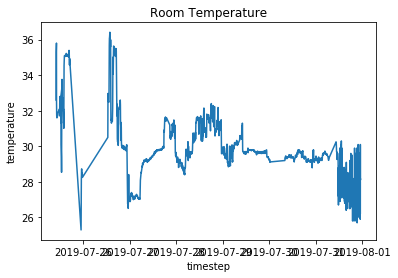

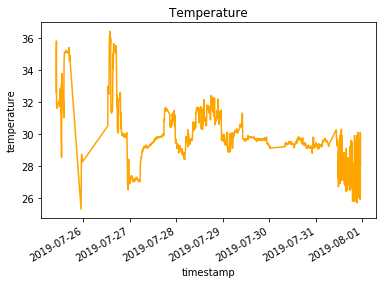

In [195]:
plt.plot(df_temp['time'], df_temp['temperature'])
plt.title("Room Temperature")
plt.xlabel('timestep')
plt.ylabel('temperature')
fig, ax = plt.subplots()
ax.plot(df_temp['time'], df_temp['temperature'], color="orange")
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('Temperature')
ax.set_xlabel('timestamp')
ax.set_ylabel('temperature')
plt.savefig('temp.png', dpi=300, bbox_inches='tight')

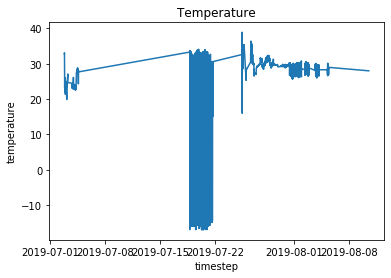

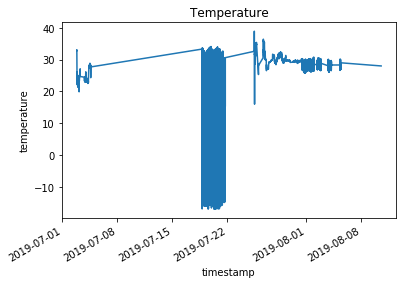

In [183]:
plt.plot(df['time'], df['temperature'])
plt.title("Temperature")
plt.xlabel('timestep')
plt.ylabel('temperature')
fig, ax = plt.subplots()
ax.plot(df['time'], df['temperature'])
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('Temperature')
ax.set_xlabel('timestamp')
ax.set_ylabel('temperature')
plt.savefig('temp_master.png', dpi=300, bbox_inches='tight')

**Humidity Graphs**

In [184]:
df_hum = df[df.humidity > 0]
df_hum = df_hum[df_hum.humidity < 100]
df_hum = df_hum[df_hum.time >= pd.to_datetime('2019-07-25')]
df_hum = df_hum[df_hum.time <= pd.to_datetime('2019-08-01')]

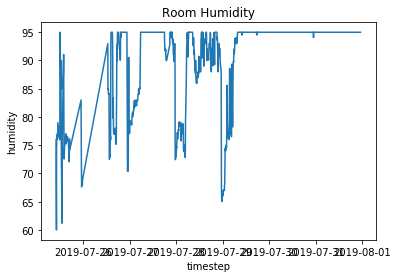

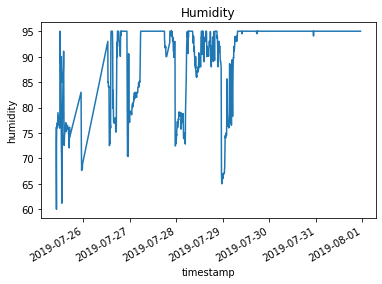

In [185]:
plt.plot(df_temp['time'], df_temp['humidity'])
plt.title("Room Humidity")
plt.xlabel('timestep')
plt.ylabel('humidity')
fig, ax = plt.subplots()
ax.plot(df_temp['time'], df_temp['humidity'])
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('Humidity')
ax.set_xlabel('timestamp')
ax.set_ylabel('humidity')
plt.savefig('hum.png', dpi=300, bbox_inches='tight')

**Cupboard Hall Sensor & Graphs**

In [186]:
df_hall = pd.read_csv('./data/hall.csv')
df_hall['time'] = pd.to_datetime(df_hall['time'])
df_hall.dtypes
df_hall['date_only'] = [ts.date() for ts in df_hall['time']]
df_hall = df_hall[df_hall.sensorReading == 'DoorOpened']
df_hall = df_hall[df_hall.time >= pd.to_datetime('2019-07-13')]
df_hall = df_hall[df_hall.time <= pd.to_datetime('2019-07-20')]

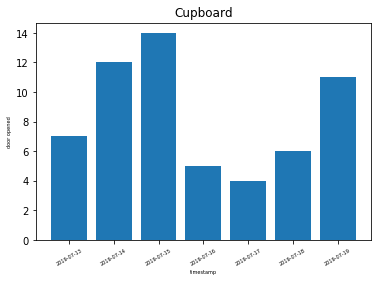

In [187]:
plt.bar(df_hall['date_only'].unique(), df_hall['date_only'].value_counts().sort_index())
plt.xlabel('timestamp', fontsize=5)
plt.ylabel('door opened', fontsize=5)
plt.xticks(fontsize=5, rotation=30)
plt.title('Cupboard')
plt.savefig('hall.png', dpi=300, bbox_inches='tight')

In [188]:
df_hall['date_only'].value_counts()

2019-07-15    14
2019-07-14    12
2019-07-19    11
2019-07-13     7
2019-07-18     6
2019-07-16     5
2019-07-17     4
Name: date_only, dtype: int64

**Pressure mat graphs(Younger)**

In [189]:
df_mat = pd.read_csv('./data/mat.csv')
df_mat = df_mat.append(pd.read_csv('./data/young_mat_bathing.csv'))
df_mat = df_mat.append(pd.read_csv('./data/young_mat_bed.csv'))
df_mat = df_mat.append(pd.read_csv('./data/young_mat_dining.csv'))
df_mat.sort_values('time',ascending=True);
df_mat['time'] = pd.to_datetime(df_mat['time'])
df_mat.dtypes
df_mat['date_only'] = [ts.date() for ts in df_mat['time']]
df_mat['time_only'] = [ts.time() for ts in df_mat['time']]
df_mat = df_mat[df_mat.time >= pd.to_datetime('2019-07-12')]
df_mat = df_mat[df_mat.time <= pd.to_datetime('2019-07-20')]
df_mat.dtypes
df_mat.head(10)
df_mat_colors = {'node10':'green', 'node11':'blue', 'node12':'orange', 'node13':'red'}
legs = [mpatches.Patch(color='green', label='Relaxing'),
       mpatches.Patch(color='blue', label='Bathing'),
       mpatches.Patch(color='orange', label='Sleeping'),
       mpatches.Patch(color='red', label='Dining')]


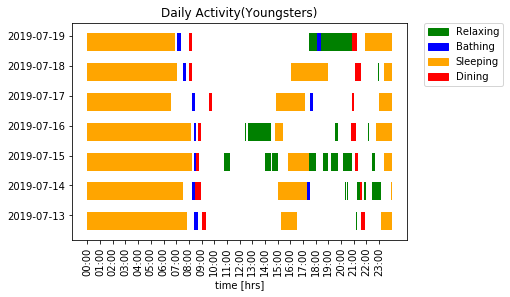

In [190]:
fig, gnt = plt.subplots()
#gnt = gnt.xaxis_date()

labels = list()
legend = list()
flag = False
start = pd.to_datetime('2019-07-25')
for j, dfm in enumerate(df_mat.groupby('client_id')):
    legend.append(dfm[0])
    for i, a in enumerate(dfm[1].groupby('date_only')):
        labels.append(a[0])
        for ind in a[1].index:
            if a[1]['pressureStatus'][ind] == 1:
                start = a[1]['time'][ind]
                if flag == False:
                    flag = True
                else:
                    duration = (a[1]['time'][ind] - start).total_seconds()
                    tod = (datetime.combine(date.min, start.time()) - datetime.min).total_seconds()
                    data = [tod, duration]
                    gnt.broken_barh([data], (i * 10,6), facecolor = df_mat_colors[a[1]['client_id'][ind]])
                    #print(data)
            elif a[1]['pressureStatus'][ind] == 0 and flag == True:
                flag = False
                if start.date() != a[1]['time'][ind].date():
                    duration = (datetime.combine(start.date(), dt.time.max) - start).total_seconds()
                    tod = (datetime.combine(date.min, start.time()) - datetime.min).total_seconds()
                    data = [tod, duration]
                    gnt.broken_barh([data], ((i - 1)* 10, 6), facecolor = df_mat_colors[a[1]['client_id'][ind]])
                    start = datetime.combine(a[1]['time'][ind].date(), dt.time.min)
                duration = (a[1]['time'][ind] - start).total_seconds()
                tod = (datetime.combine(date.min, start.time()) - datetime.min).total_seconds()
                data = [tod, duration]
                gnt.broken_barh([data], (i * 10,6), facecolor = df_mat_colors[a[1]['client_id'][ind]])
                #print(data)     
                
gnt.set_yticks(range(5, (len(df_mat['date_only'].unique())) * 10 + 5, 10))
gnt.set_yticklabels(df_mat['date_only'].unique())
xlim = range(0, 24*3600, 3600)
plt.xticks(xlim, [str(n).zfill(2) + ':00' for n in range(0,24)], rotation='vertical')
gnt.set_xlabel("time [hrs]")
plt.legend(handles = legs,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Daily Activity(Youngsters)')
plt.savefig('pres_young.png', dpi=300, bbox_inches='tight')

**Pressure mat graphs(Elder)**

In [191]:
df_mat = pd.read_csv('./data/mat_el.csv')
df_mat = df_mat.append(pd.read_csv('./data/elder_mat_bathing.csv'))
df_mat = df_mat.append(pd.read_csv('./data/elder_mat_bed.csv'))
df_mat = df_mat.append(pd.read_csv('./data/elder_mat_dining.csv'))
df_mat.sort_values('time',ascending=True);
df_mat['time'] = pd.to_datetime(df_mat['time'])
df_mat.dtypes
df_mat['date_only'] = [ts.date() for ts in df_mat['time']]
df_mat['time_only'] = [ts.time() for ts in df_mat['time']]
df_mat = df_mat[df_mat.time >= pd.to_datetime('2019-07-12')]
df_mat = df_mat[df_mat.time <= pd.to_datetime('2019-07-20')]
df_mat.dtypes
df_mat.head(10)
df_mat_colors = {'node15':'green', 'node16':'blue', 'node17':'orange', 'node18':'red'}
legs = [mpatches.Patch(color='green', label='Relaxing'),
       mpatches.Patch(color='blue', label='Bathing'),
       mpatches.Patch(color='orange', label='Sleeping'),
       mpatches.Patch(color='red', label='Dining')]

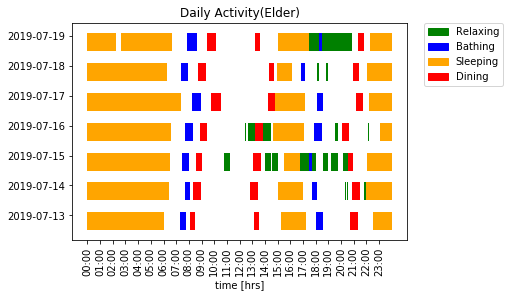

In [192]:
fig, gnt = plt.subplots()
#gnt = gnt.xaxis_date()

labels = list()
legend = list()
flag = False
start = pd.to_datetime('2019-07-25')
for j, dfm in enumerate(df_mat.groupby('client_id')):
    legend.append(dfm[0])
    for i, a in enumerate(dfm[1].groupby('date_only')):
        labels.append(a[0])
        for ind in a[1].index:
            if a[1]['pressureStatus'][ind] == 1:
                start = a[1]['time'][ind]
                if flag == False:
                    flag = True
                else:
                    duration = (a[1]['time'][ind] - start).total_seconds()
                    tod = (datetime.combine(date.min, start.time()) - datetime.min).total_seconds()
                    data = [tod, duration]
                    gnt.broken_barh([data], (i * 10,6), facecolor = df_mat_colors[a[1]['client_id'][ind]])
                    #print(data)
            elif a[1]['pressureStatus'][ind] == 0 and flag == True:
                flag = False
                if start.date() != a[1]['time'][ind].date():
                    duration = (datetime.combine(start.date(), dt.time.max) - start).total_seconds()
                    tod = (datetime.combine(date.min, start.time()) - datetime.min).total_seconds()
                    data = [tod, duration]
                    gnt.broken_barh([data], ((i - 1)* 10, 6), facecolor = df_mat_colors[a[1]['client_id'][ind]])
                    start = datetime.combine(a[1]['time'][ind].date(), dt.time.min)
                duration = (a[1]['time'][ind] - start).total_seconds()
                tod = (datetime.combine(date.min, start.time()) - datetime.min).total_seconds()
                data = [tod, duration]
                gnt.broken_barh([data], (i * 10,6), facecolor = df_mat_colors[a[1]['client_id'][ind]])
                #print(data)     
                
gnt.set_yticks(range(5, (len(df_mat['date_only'].unique())) * 10 + 5, 10))
gnt.set_yticklabels(df_mat['date_only'].unique())
xlim = range(0, 24*3600, 3600)
plt.xticks(xlim, [str(n).zfill(2) + ':00' for n in range(0,24)], rotation='vertical')
gnt.set_xlabel("time [hrs]")
plt.title('Daily Activity(Elder)')
plt.legend(handles = legs,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('pres_elder.png', dpi=300, bbox_inches='tight')

**Lavatory Visits**

In [193]:
df_lav = pd.read_csv('./data/young_hall_lavatory.csv')
df_lav = df_lav.append(pd.read_csv('./data/elder_hall_lavatory.csv'))
df_lav['time'] = pd.to_datetime(df_lav['time'])
df_lav.dtypes
df_lav['date_only'] = [ts.date() for ts in df_lav['time']]
df_lav = df_lav[df_lav.sensorReading == 'DoorOpened']
df_lav = df_lav[df_lav.time >= pd.to_datetime('2019-07-13')]
df_lav = df_lav[df_lav.time <= pd.to_datetime('2019-07-20')]

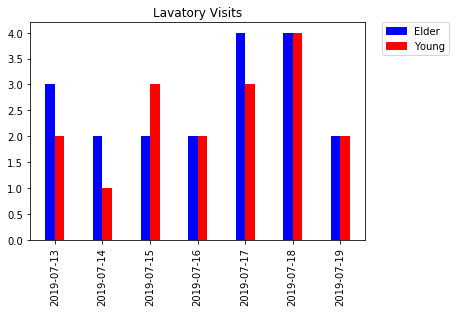

In [194]:
x = df_lav['date_only'].unique()
x = date2num(x)

y = df_lav[df_lav.client_id == 'node05']
y = y['date_only'].value_counts().sort_index()
k = df_lav[df_lav.client_id == 'node06']
k = k['date_only'].value_counts().sort_index()

ax = plt.subplot(111)
ax.bar(x-0.1, y, width=0.2, color='b', align='center')
ax.bar(x+0.1, k, width=0.2, color='r', align='center')
ax.xaxis_date()
#plt.autofmt_xdate()
plt.xticks(rotation='vertical')
legs = [mpatches.Patch(color='blue', label='Elder'),
       mpatches.Patch(color='red', label='Young')]
plt.legend(handles = legs,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('lav.png', dpi=300, bbox_inches='tight')
plt.title('Lavatory Visits')
plt.show()

**TV Sample data generator**

In [274]:
date_list_tv = ['13-07-2019', 
        '14-07-2019', 
        '14-07-2019', 
        '15-07-2019', 
        '16-07-2019', 
        '17-07-2019', 
        '18-07-2019', 
        '19-07-2019']
hours_spent_tv = []

In [275]:
for i in date_list_tv:
    hours_spent_tv.append((datetime.min + timedelta(hours = randrange(10), minutes = randrange(60), seconds = randrange(60))).time())

**AC Sample Data generator**

In [276]:
date_list_ac = ['13-07-2019', 
        '14-07-2019', 
        '14-07-2019', 
        '15-07-2019', 
        '16-07-2019', 
        '17-07-2019', 
        '18-07-2019', 
        '19-07-2019']
hours_spent_ac = []

In [277]:
for i in date_list_ac:
    hours_spent_ac.append((datetime.min + timedelta(hours = randrange(24), minutes = randrange(60), seconds = randrange(60))).time())

**TV Data Plotter**

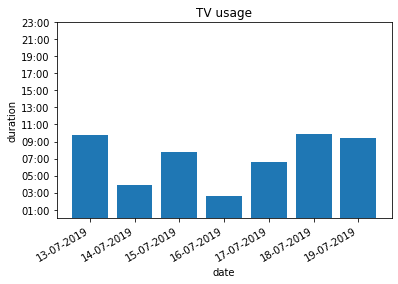

In [302]:
fig, ax = plt.subplots()
#ax.set_yticks(datetime.min.time(), datetime.max.time())
#ax.yaxis.set_major_locator(HourLocator())
ax.set_xlabel('date')
ax.set_ylabel('duration')
plt.title('TV usage')
ax.bar(date_list_tv, hours_spent_tv)
fig.autofmt_xdate()
plt.yticks(np.arange(3600, 86400, step=7200))
plt.savefig('tv.png', dpi=300, bbox_inches='tight')

**AC Data Plotter**

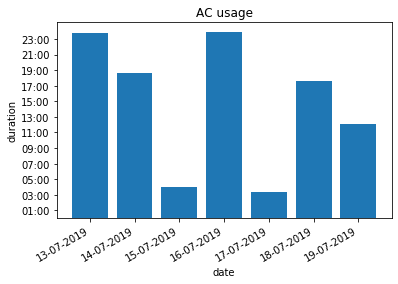

In [301]:
fig, ax = plt.subplots()
ax.set_xlabel('date')
ax.set_ylabel('duration')
plt.title('AC usage')
ax.bar(date_list_ac, hours_spent_ac)
fig.autofmt_xdate()
plt.yticks(np.arange(3600, 86400, step=7200))
plt.savefig('ac.png', dpi=300, bbox_inches='tight')

In [300]:
hours_spent_ac

[datetime.time(23, 46, 47),
 datetime.time(18, 36, 31),
 datetime.time(7, 9, 48),
 datetime.time(3, 58, 44),
 datetime.time(23, 56, 20),
 datetime.time(3, 22, 7),
 datetime.time(17, 38, 54),
 datetime.time(12, 3, 6)]